An initial analysis
===================
An initial analysis of the data.json.

**In this notebook**:

- Read in data
- Describition of data
- Fix names (but when are two names really the same?) 
- Tables
- Plots

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import re
import collections
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in data
df = pd.read_json('data.json')

In [3]:
df.describe()

,date
count,9619.000000
mean,2009.075788
std,5.658745
min,1966.000000
25%,2007.000000
50%,2010.000000
75%,2013.000000
max,2017.000000


In [4]:
len(df['unique_key'].unique())

1111

# A bit clean up with names

In [5]:
df.author = df.author.str.lower()

In [6]:
def compare(s, t):
    return sorted(s) == sorted(t)

In [7]:
# a function to fix the names. When are two names the same? 
for i in df.author.unique():
    for j in df.author.unique():
        author1 = i.split()
        author2 = j.split()
        if compare(author1, author2):
            df.author = df.author.replace(j, i)
            
        else:    
            author1 = i.split()
            author2 = j.split()
            au1_init = [init[0] for init in author1]
            au2_init = [init[0] for init in author2]
            if len(set(author1).intersection(set(author2)))/ len(author1) >= 0.6 and compare(au1_init, au2_init) :
                df.author = df.author.replace(j, i) 
# exception
df.author = df.author.replace("matjaz perc", "matjaž perc")  

Tables
======

# 1. Provenance

From which APIs the articles came from?

In [8]:
df.groupby(['unique_key', 'provenance']).size().reset_index().groupby('provenance').size()

provenance
IEEE        253
Nature       26
PLOS         61
Springer    313
arXiv       458
dtype: int64

# 2. Key words
The most used key words

Before analysing the key words all must be lower case.

In [9]:
df.key_word = df.key_word.str.lower()

In [10]:
df.groupby(['unique_key', 'key_word']).size().reset_index().groupby('key_word').size().order(ascending=False)

/home/nightwing/anaconda3/envs/axelbib/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


key_word
none                                  858
game theory                           205
games                                 106
evolutionary computation               73
nash equilibrium                       37
thin film transistors                  37
multi-agent systems                    37
iterative methods                      36
statistics                             35
computer science                       32
sociology                              31
evolution (biology)                    30
genetic algorithms                     27
biological system modeling             25
computational modeling                 24
learning (artificial intelligence)     24
decision making                        21
educational institutions               20
mathematical model                     20
automata                               19
costs                                  19
humans                                 19
neural networks                        17
finite state machines    

Irrelevant key words: 
---------------------

There is a list of words that are irrelevant with the PD and the articles themselves. *note: Key words come from IEEE and Nature only.* 
Such as:
- Thin Film Transistors
- Toy industry
- Elements (Helium, Gold, Nickel, Manganese)
- Mirrors
- Bishmuth

After a bit of searching I believe IEEE uses a kind of nature launguage process for it keywords. 
For examples:

- Thin film Transistors: http://ieeexplore.ieee.org/document/725486/. Though neither in the title or abstract the key word makes no sense, in the article the word TFT is continuously repeated. 
- Helium: http://ieeexplore.ieee.org/document/5333456/. Because the words 'EEG' and 'Helium' are often studied together


None: 
-----

Just by reading abstracts I have manually filled in a few labels fields. 
If natural language process allow us to match titles-abstract with labels we created most work done by key words can be replaced by labels and the amount of none should not affect us.

# 3. Labels
As an example. We are not there yet with the labels.

In [11]:
df.groupby(['unique_key', 'labels']).size().reset_index().groupby('labels').size().order(ascending=False)

/home/nightwing/anaconda3/envs/axelbib/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


labels
None                     1025
For general knowledge      31
Spatial Tournament         17
Evolution                  17
Social                     10
Strategy                    6
Economics                   4
Automaton                   3
Decision theory             3
Optimazation                3
Neural network              3
Healthcare                  2
Zero determinant            2
Noise                       2
Simulation                  2
Multigames                  2
Markov process              1
Lattice                     1
Memory                      1
Finite memory               1
Risk                        1
Sequential                  1
Continuous                  1
dtype: int64

# 4. Titles

While looking at the db words in the titles such as:

- social
- spatial
- network
- evolution
- decision
- newcomb
- noise

did stand out. 

In [12]:
# get unique titles in a list
words_from_titles = df.title.str.lower().unique()
# split the words into a list
words_from_titles = [item.split(' ') for item in words_from_titles]
words_from_titles = [item for sublist in words_from_titles for item in sublist]
# remove words with maximum 3 letters('of', 'a', 'and')
words_from_titles = [item for item in words_from_titles if len(item) > 3]

In [13]:
counter = collections.Counter(words_from_titles)

In [14]:
counter.most_common()

[('dilemma', 532),
 ("prisoner's", 321),
 ('cooperation', 211),
 ('game', 205),
 ('prisoner’s', 184),
 ('iterated', 141),
 ('games', 135),
 ('with', 131),
 ('networks', 85),
 ('strategies', 83),
 ('evolutionary', 82),
 ('evolution', 80),
 ('spatial', 75),
 ('strategy', 52),
 ('quantum', 48),
 ('social', 46),
 ('model', 42),
 ('based', 38),
 ('learning', 36),
 ('repeated', 36),
 ('cooperative', 36),
 ('dynamics', 36),
 ('network', 34),
 ('analysis', 32),
 ('theory', 31),
 ('emergence', 31),
 ('behavior', 31),
 ('using', 31),
 ("prisoners'", 31),
 ('tit-for-tat', 30),
 ('from', 27),
 ('agents', 27),
 ('dilemma:', 27),
 ('memory', 25),
 ('effects', 25),
 ('under', 24),
 ('groups', 23),
 ('dilemmas', 21),
 ('dynamic', 21),
 ('structure', 21),
 ('study', 20),
 ('between', 19),
 ('prisoners’', 19),
 ('effect', 19),
 ('selection', 18),
 ('approach', 18),
 ('promotes', 18),
 ('stochastic', 18),
 ('solution', 17),
 ('problem', 17),
 ('population', 15),
 ('interaction', 15),
 ('reciprocity', 15)

# 5. Authors

In [15]:
df.groupby(['unique_key', 'author']).size().reset_index().groupby('author').size().order(ascending=False)

/home/nightwing/anaconda3/envs/axelbib/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


author
matjaž perc              32
szolnoki  attila         26
wang  long               18
gyorgy szabo             15
daniel ashlock           14
zhen wang                13
wu  zhi-xi               12
angel sánchez            11
yusuke nojima            11
ishibuchi  hisao         11
jose a. cuesta           10
xiaojie chen             10
zhihai rong              10
jeffrey tsang            10
krishnendu chatterjee     9
dirk helbing              9
azhar iqbal               9
fu feng                   8
ishida yoshiteru          8
l. m. floría              7
martin a. nowak           7
lee a. dugatkin           7
j. gomez-gardenes         7
y. moreno                 7
jiawei li                 7
moreno  yamir             7
derek abbott              7
vukov  jeromos            7
eun-youn kim              6
takahiko sudo             6
                         ..
nobue adachi              1
noritsugu nakanishi       1
nadiya kostyuk            1
n. leahy                  1
ming cao     

We can also look at Authors and key words. This can show us whether an author jumped field or even 
indintify topics within the IPD which are strongly related.


In [16]:
authors_field =df[df['key_word'] != 'none'].groupby(['unique_key', 'author', 'date', 'key_word']).size().reset_index().groupby(['author', 'date', 'key_word']).size()
authors_field = pd.DataFrame(authors_field)
authors_field

0
author        date key_word                            
a. acan       2003 ant colony optimization            1
                   application software               1
                   artificial life                    1
                   biological system modeling         1
                   biology                            1
                   computer science                   1
                   game theory                        1
                   games of skill                     1
                   genetic algorithms                 1
                   linear matrix inequalities         1
                   resists                            1
                   robustness                         1
a. coelho     2003 automation                         1
                   clustering algorithms              1
                   costs                              1
                   distributed control                1
                   distributed shared memory systems  1
                   distribution strategy              1
                   laboratories                       1
                   nearest neighbor searches          1
                   parallel algorithms                1
                   personal communication networks    1
                   processor scheduling               1
                   rendering (computer graphics)      1
                   resource allocation                1
                   scientific computing               1
                   systems engineering and theory     1
                   workstation clusters               1
a. colosimo   2007 brain modeling                     1
                   cognition                          1
...                                                  ..
zhuozheng li  2009 history                            1
                   humans                             1
                   lattice theory                     1
                   lattices                           1
                   matrix algebra                     1
                   nash equilibrium                   1
                   network theory (graphs)            1
                   numerical simulation               1
                   organisms                          1
zichuan xu    2010 algorithm design and analysis      1
                   game theory                        1
                   games                              1
                   multicore processing               1
                   multiprocessing systems            1
                   processor scheduling               1
                   radiation detectors                1
                   scheduling                         1
özgün töreyen 2010 cities and towns                   1
                   clustering algorithms              1
                   europe                             1
                   gallium                            1
                   game theory                        1
                   games                              1
                   genetic algorithms                 1
                   multi-agent systems                1
                   multiagent systems                 1
                   optimization                       1
                   pattern clustering                 1
                   simulated annealing                1
                   travelling salesman problems       1

[6237 rows x 1 columns]

Plots
=====

# 6. Years

Happy to see older articles as well. 

Two outliers: 1847, 1957. From 1966 there is a contunious trend.

In [17]:
num_articles_per_year = df.groupby('date').size()

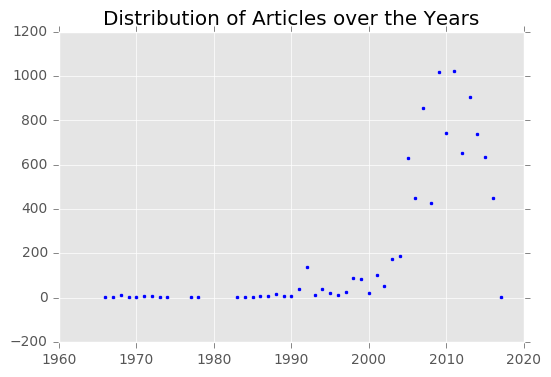

In [18]:
plt.figure();
plt.title("Distribution of Articles over the Years")
pylab.scatter(num_articles_per_year.index, num_articles_per_year, s=10)

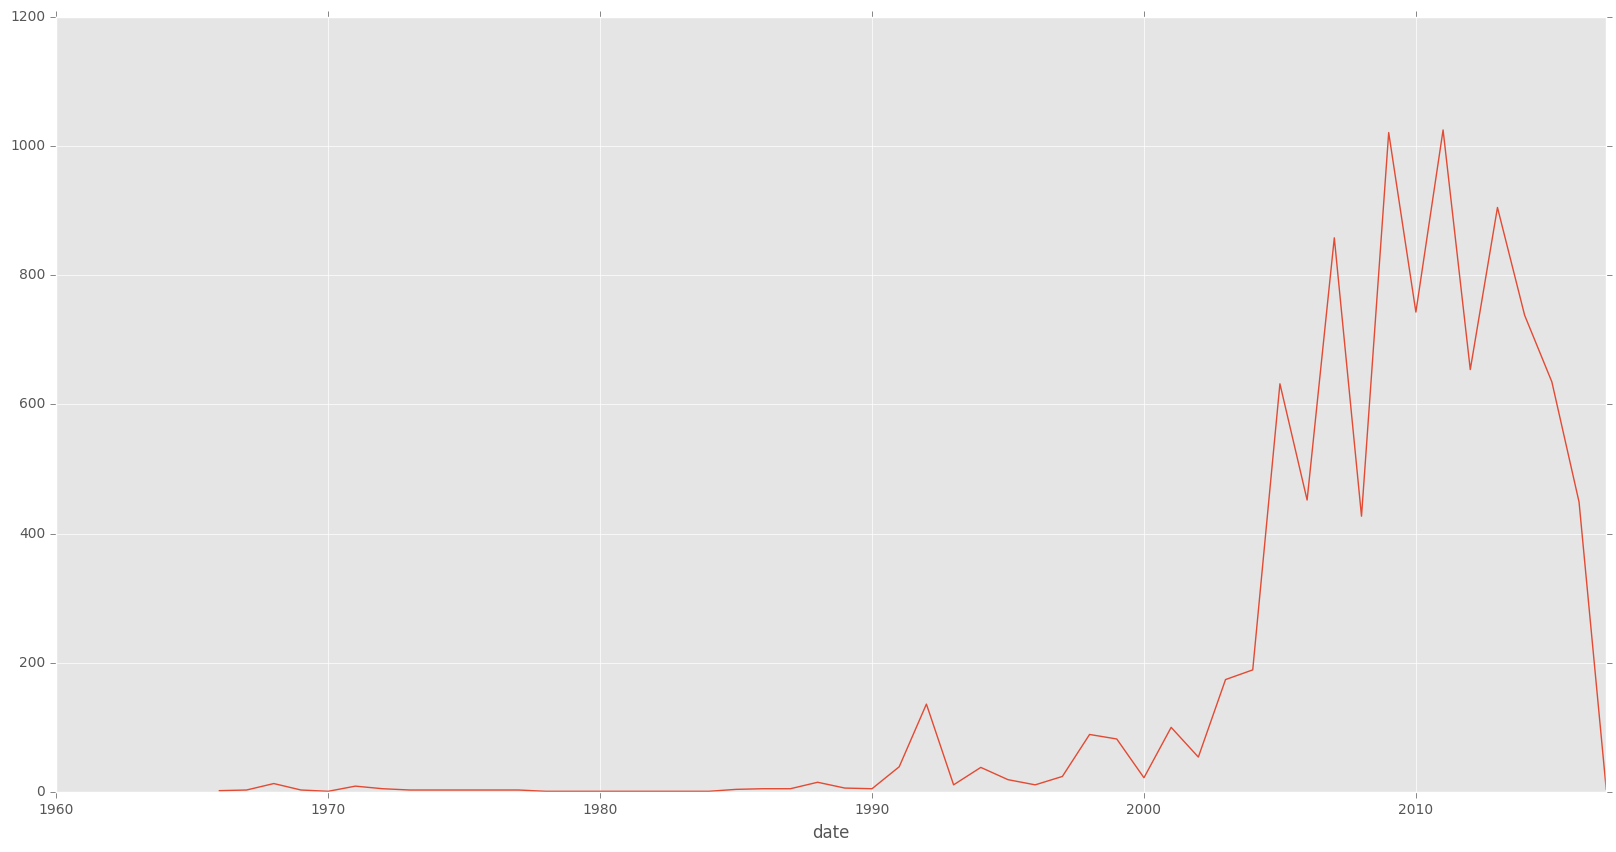

In [19]:
fig = figure(figsize=(20, 10))
num_articles_per_year.plot(xlim=1960)

# 7. Trends

Are seperated as:

- Key words with articles per year

- Lables with articles per year

- Author with articles per year

# 7.1 Key words

In [20]:
key_word_freq = df.groupby(['unique_key', 'key_word']).size().reset_index().groupby('key_word').size()
mst_freq = key_word_freq[key_word_freq >= 10].keys()
mst_freq = mst_freq.drop('none', 'thin film transistors')
key_word_trend =df[df['key_word'].isin(mst_freq)].groupby(['unique_key', 'key_word', 'date']).size().reset_index().groupby(['key_word', 'date']).size()
key_word_trend = pd.DataFrame(key_word_trend)

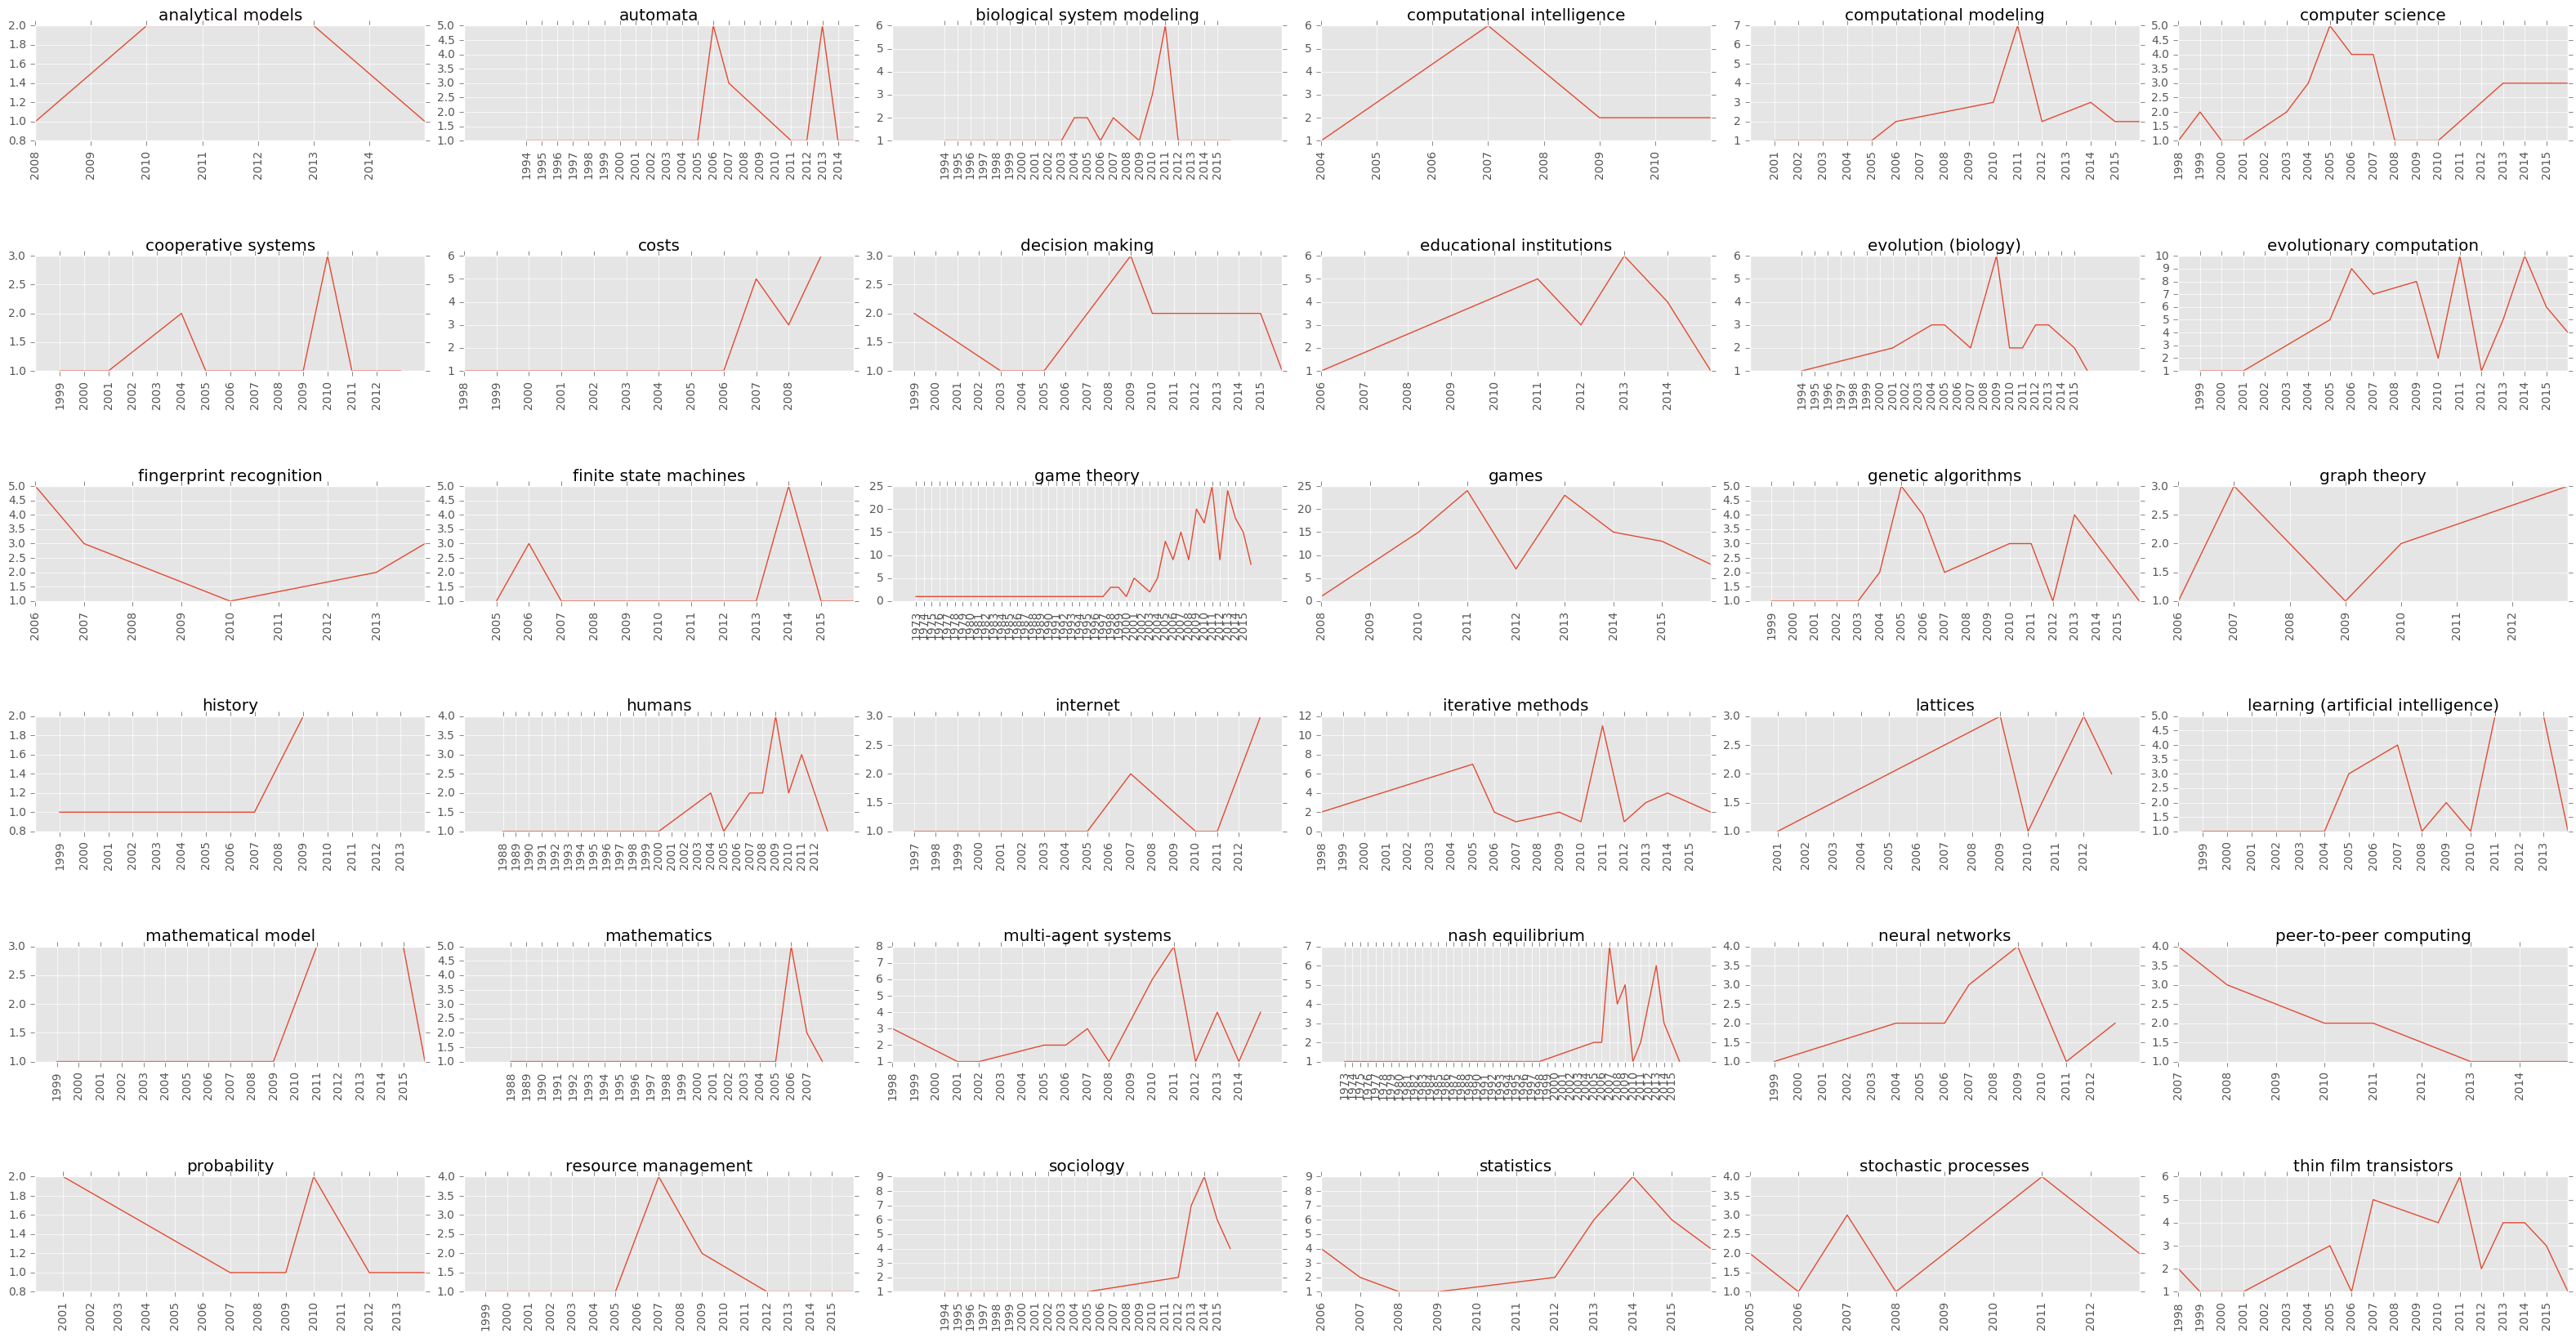

In [21]:
fig, axs = plt.subplots(6,6, figsize=(40, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.1)

axs = axs.ravel()
i = 0

for groupID, data in key_word_trend.groupby(level='key_word'):

    axs[i].plot(data.index.get_level_values('date'), data.values.ravel())
    dates = data.index.get_level_values('date')
    axs[i].set_xticks(range(dates.min(), dates.max()))
    axs[i].set_xticklabels(range(dates.min(), dates.max()), rotation=90)
    axs[i].set_title('{}'.format(groupID))
    i += 1

# 7.2 Labels

Again labels will have more to say once the natural language process does the matching. 

In [22]:
labels_trend =df.groupby(['unique_key', 'labels', 'date']).size().reset_index().groupby(['labels', 'date']).size()
labels_trend = pd.DataFrame(labels_trend)

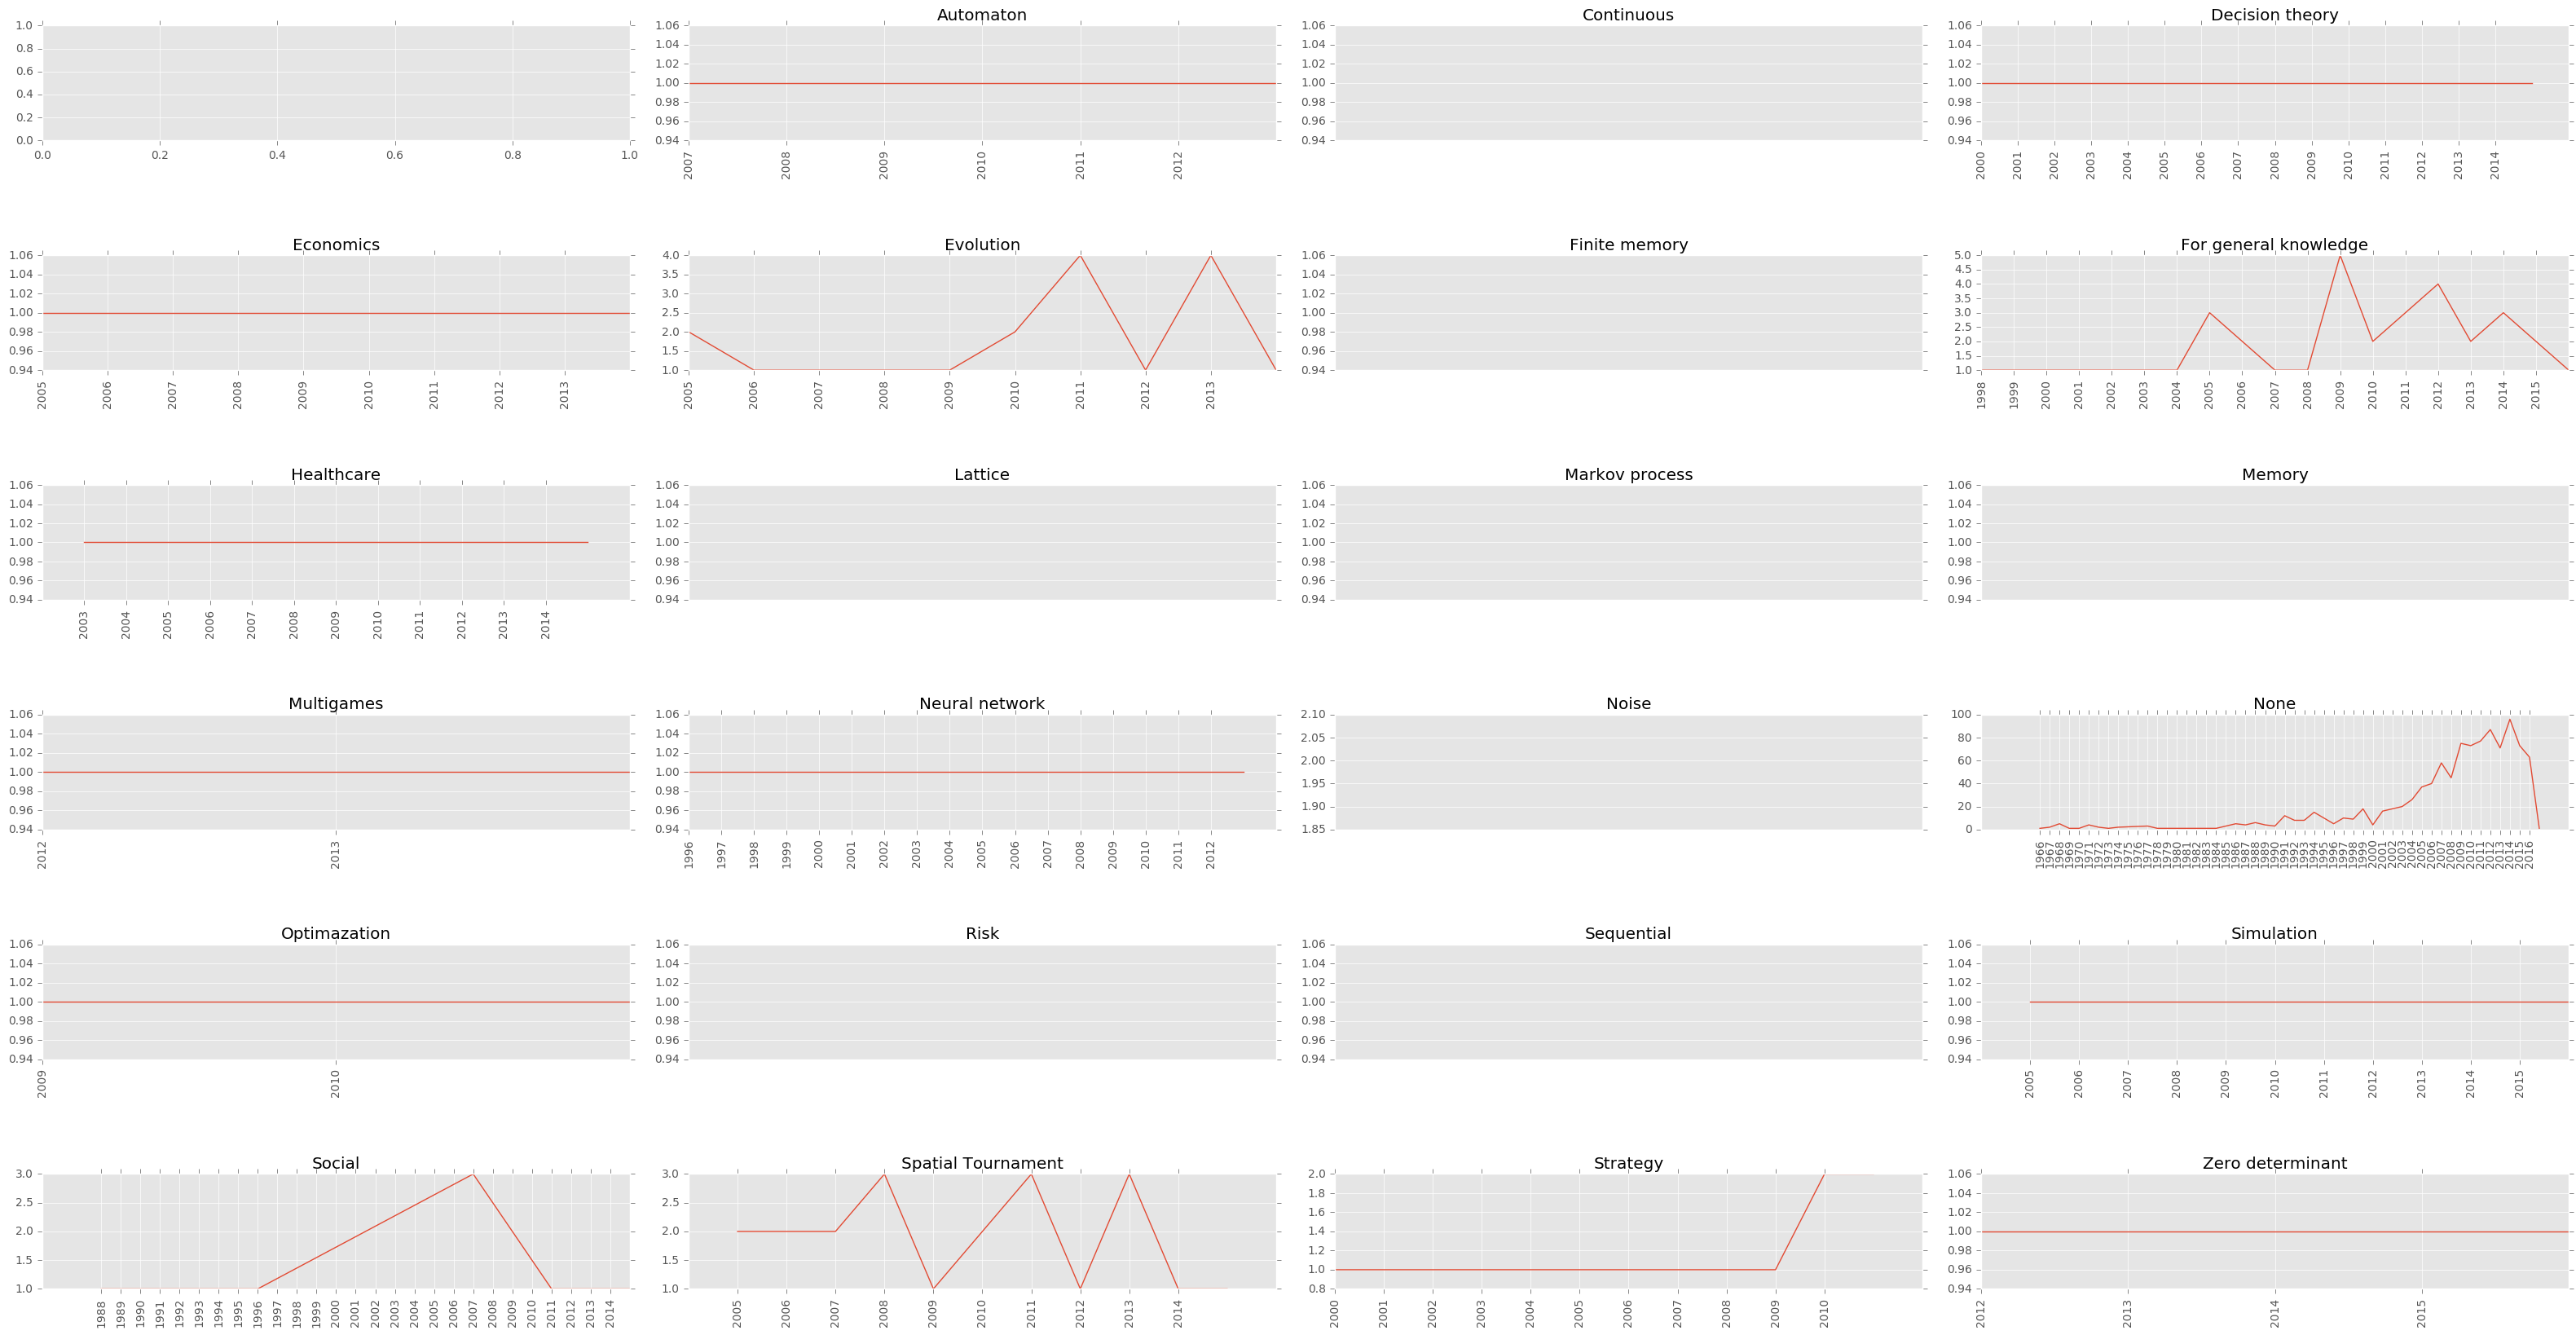

In [23]:
fig, axs = plt.subplots(6,4, figsize=(40, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.1)

axs = axs.ravel()
i = 1

for groupID, data in labels_trend.groupby(level='labels'):

    axs[i].plot(data.index.get_level_values('date'), data.values.ravel())
    dates = data.index.get_level_values('date')
    axs[i].set_xticks(range(dates.min(), dates.max()))
    axs[i].set_xticklabels(range(dates.min(), dates.max()), rotation=90)
    axs[i].set_title('{}'.format(groupID))
    i += 1

# 7.3 Authors

Authors with number of article can show us the productivity of an author.

**Note** that the following example is only for the most activate authors within the db. This can be expand
to all the authors.

In [32]:
authors_freq = df.groupby(['unique_key', 'author']).size().reset_index().groupby('author').size()
more_one = authors_freq[authors_freq >= 5].keys()
authors_prod =df[df['author'].isin(more_one)].groupby(['unique_key', 'author', 'date']).size().reset_index().groupby(['author', 'date']).size()
authors_prod = pd.DataFrame(authors_prod)

In [33]:
len(more_one)

51

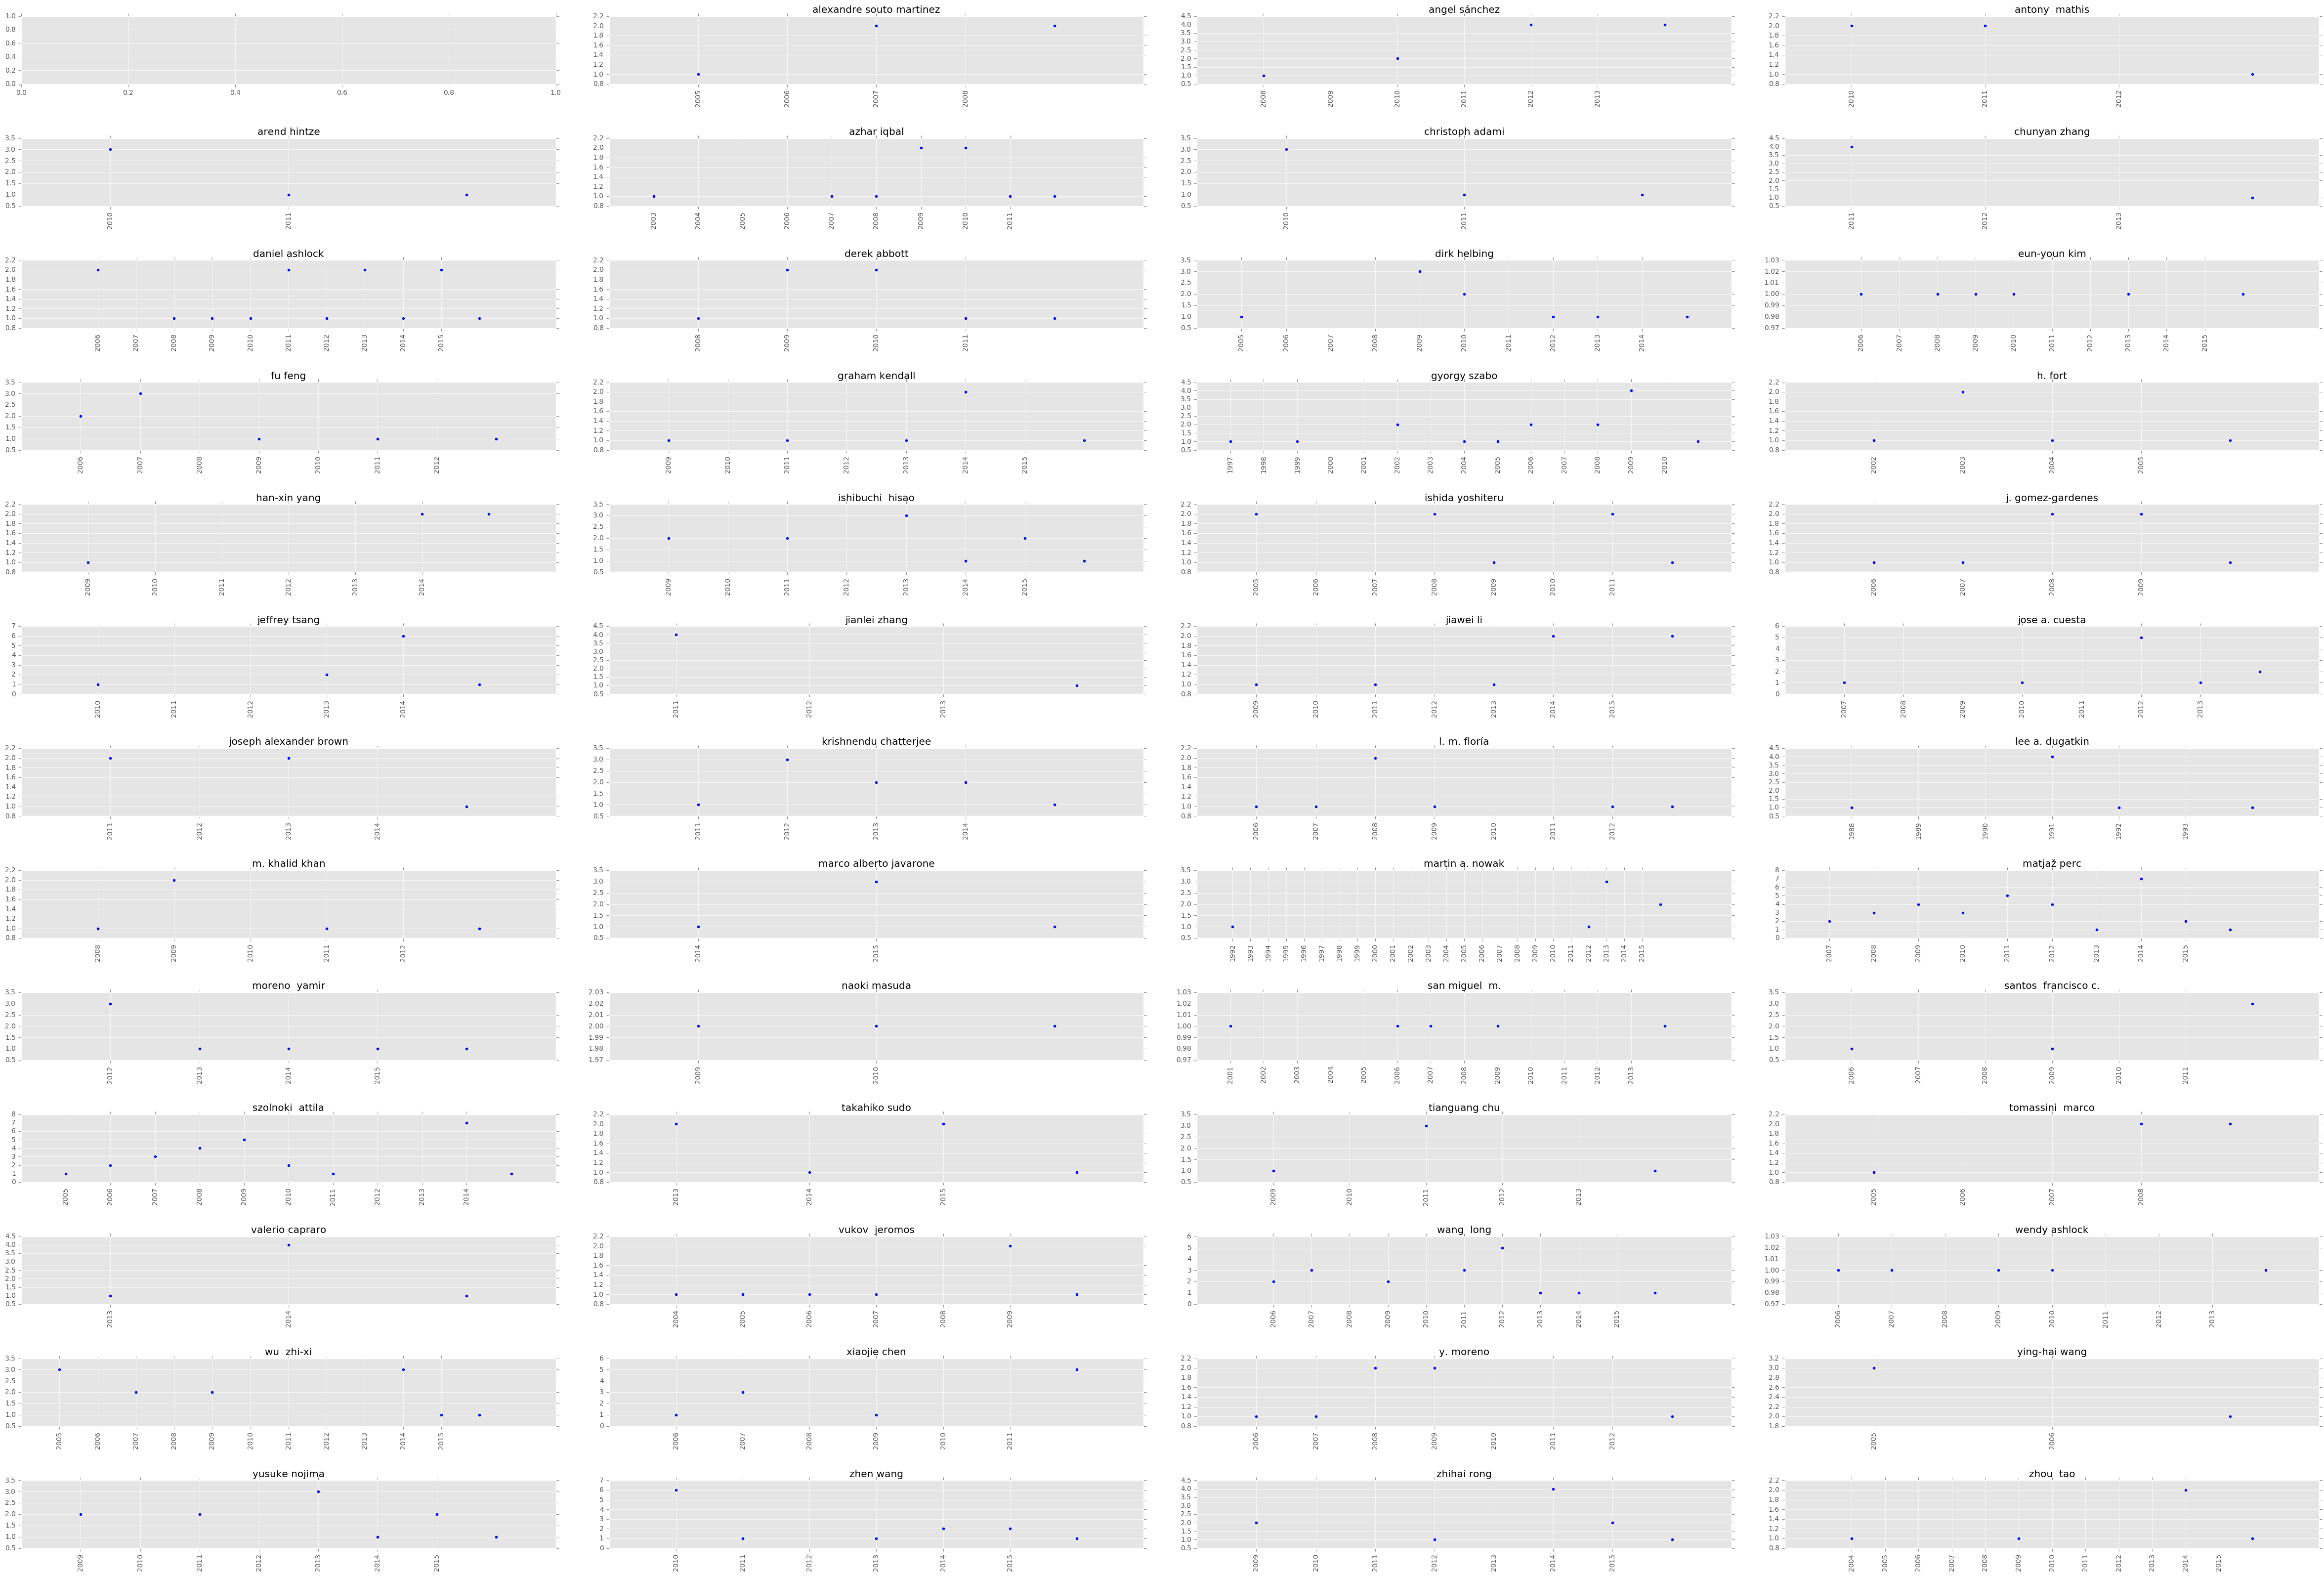

In [29]:
fig, axs = plt.subplots(13,4, figsize=(60, 40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.8, wspace=.1)
axs = axs.ravel()
i = 1

for groupID, data in authors_prod.groupby(level='author'):
    
    x = data.index.get_level_values('date')
    y = data.values.ravel()
    axs[i].scatter(x, y)
    axs[i].set_yticks = y
    axs[i].set_xticks(range(x.min(), x.max()))
    axs[i].set_xticklabels(range(x.min(), x.max()), rotation=90)
    axs[i].set_title('{}'.format(groupID))
    i += 1